In [186]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import sklearn

In [361]:
college_statistics = pd.read_csv("college_statistics.csv")
statistics = pd.DataFrame(college_statistics, 
                         columns = ["player_name", "statistic", "value"])

statistics.dropna(subset="player_name", inplace=True)
statistics["value"].fillna(0, inplace=True)
statistics.isna().sum()
statistics.drop_duplicates(subset=["statistic"])
statistics
pivot_statistics = statistics.pivot_table(index="player_name", columns="statistic", values="value", aggfunc = 'mean')
pivot_statistics.reset_index(inplace=True)
pivot_statistics= pivot_statistics.fillna(0)
pivot_statistics

,player_name,statistic,value
0,Royce Smith,Total Tackles,20.0
1,Royce Smith,Solo Tackles,9.0
2,Royce Smith,Assist Tackles,11.0
3,Royce Smith,Passes Defended,0.0
4,Royce Smith,Sacks,0.0
...,...,...,...
66667,Donovan Stiner,Sacks,0.0
66668,Donovan Stiner,Forced Fumbles,0.0
66669,Donovan Stiner,Interceptions,0.0
66670,Donovan Stiner,Interception Yards,0.0


In [363]:
college_statistics

,player_id,alt_player_id,player_name,pos_abbr,school,school_abbr,school_primary_color,school_alt_color,season,statistic,value,active,all_star
0,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2015,Total Tackles,20.0,True,False
1,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2015,Solo Tackles,9.0,True,False
2,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2015,Assist Tackles,11.0,True,False
3,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2015,Passes Defended,0.0,True,False
4,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2015,Sacks,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66667,105468,4240599,Donovan Stiner,S,Florida,FLA,#0021A5,#0021a5,2020,Sacks,0.0,True,False
66668,105468,4240599,Donovan Stiner,S,Florida,FLA,#0021A5,#0021a5,2020,Forced Fumbles,0.0,True,False
66669,105468,4240599,Donovan Stiner,S,Florida,FLA,#0021A5,#0021a5,2020,Interceptions,0.0,True,False
66670,105468,4240599,Donovan Stiner,S,Florida,FLA,#0021A5,#0021a5,2020,Interception Yards,0.0,True,False


In [291]:
nfl_prospect = pd.read_csv("nfl_draft_prospects.csv")
prospect = pd.DataFrame(nfl_prospect, 
                        columns=["player_name", "pos_abbr", "round", "height", "weight"])
prospect.dropna(subset="round", inplace=True)
prospect.dropna(subset="height", inplace=True)
prospect.dropna(subset="weight", inplace=True)
prospect.dropna(subset="pos_abbr", inplace = True)
prospect

,player_name,pos_abbr,round,height,weight
7202,Eli Manning,QB,1.0,77.0,221.0
7203,Robert Gallery,OT,1.0,79.0,323.0
7204,Larry Fitzgerald,WR,1.0,75.0,221.0
7205,Philip Rivers,QB,1.0,77.0,224.0
7206,Sean Taylor,DB,1.0,75.0,228.0
...,...,...,...,...,...
13242,Kawaan Baker,WR,7.0,73.0,215.0
13243,Kylin Hill,RB,7.0,71.0,214.0
13244,Jermar Jefferson,RB,7.0,70.0,206.0
13245,Dax Milne,WR,7.0,73.0,193.0


In [364]:
nfl_prospect

,draft_year,player_id,player_name,position,pos_abbr,school,school_name,school_abbr,link,pick,...,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
0,1967,23590,Bubba Smith,Defensive End,DE,Michigan State,Spartans,MSU,http://insider.espn.com/nfl/draft/player/_/id/...,1.0,...,Baltimore Colts,IND,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1967,23591,Clinton Jones,Running Back,RB,Michigan State,Spartans,MSU,http://insider.espn.com/nfl/draft/player/_/id/...,2.0,...,Minnesota Vikings,MIN,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1967,23592,Steve Spurrier,Quarterback,QB,Florida,Gators,FLA,http://insider.espn.com/nfl/draft/player/_/id/...,3.0,...,San Francisco 49ers,SF,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1967,23593,Bob Griese,Quarterback,QB,Purdue,Boilermakers,PUR,http://insider.espn.com/nfl/draft/player/_/id/...,4.0,...,Miami Dolphins,MIA,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1967,23594,George Webster,Linebacker,LB,Michigan State,Spartans,MSU,http://insider.espn.com/nfl/draft/player/_/id/...,5.0,...,Houston Oilers,TEN,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,2021,105466,Justus Reed,Defensive End,DE,Virginia Tech,Hokies,VT,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,841ed58127d19410cc2849ea8f3e1070,253.0,75.000,31.0,344.0,30.0,NaN
13350,2021,105467,K.J. Costello,Quarterback,QB,Mississippi State,Bulldogs,MSST,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,151d962cf4bf1862bcef120a11880e57,227.0,76.625,15.0,345.0,30.0,NaN
13351,2021,105468,Donovan Stiner,Safety,S,Florida,Gators,FLA,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,d12830501cce353220df8c6bd2b050fc,205.0,73.500,29.0,346.0,30.0,NaN
13352,2021,105478,Mac McCain III,Cornerback,CB,North Carolina A&T,Aggies,NCAT,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,8d1939ce8d84d85651dcff926bebc08b,186.0,71.000,44.0,348.0,30.0,https://a.espncdn.com/i/headshots/nfldraft/pla...


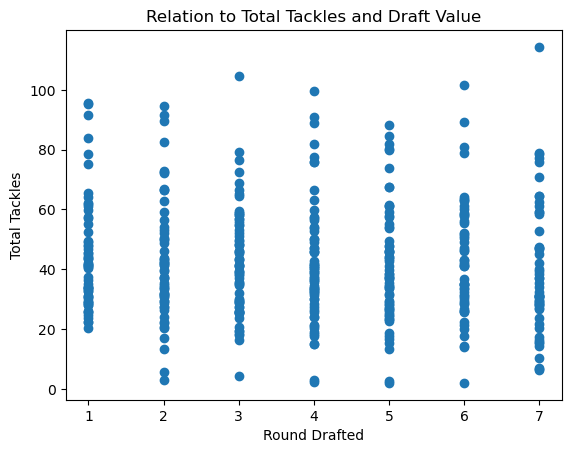

In [360]:
combined = pd.merge(pivot_statistics, prospect, on="player_name", how="inner")
combined = combined.drop("player_name", axis = 1)
condition = combined['pos_abbr']=="QB"
combined_qb_filtered = combined[condition]

rb_condition = combined['pos_abbr'] == 'RB'
fb_condition = combined['pos_abbr'] == 'FB'
wr_condition = combined['pos_abbr'] == 'WR'
te_condition = combined['pos_abbr'] == 'TE'
og_condition = combined['pos_abbr'] == "OG"
ot_condition = combined['pos_abbr'] == "OT"
p_condition = combined['pos_abbr'] =='P'
pk_condition = combined['pos_abbr'] == 'PK'
dt_condition = combined['pos_abbr'] == 'DT'
de_condition = combined['pos_abbr'] == 'DE'
cb_condition = combined['pos_abbr'] == 'CB'
ilb_condition = combined['pos_abbr'] == "ILB"
lb_condition = combined['pos_abbr'] == "LB"
olb_condition = combined['pos_abbr'] == "OLB"
s_condition = combined['pos_abbr'] == 'S'



combined_condition = rb_condition | wr_condition | te_condition
combined_skilled_position = combined[combined_condition]

defense_condition = dt_condition | de_condition | cb_condition | ilb_condition | lb_condition | olb_condition | s_condition
combined_defense = combined[defense_condition]
combined_defense

fig, ax = plt.subplots()
ax.scatter(combined_defense['round'], combined_defense["Total Tackles"])
ax.set(title = "Relation to Total Tackles and Draft Value", 
      xlabel = "Round Drafted",
      ylabel = "Total Tackles");

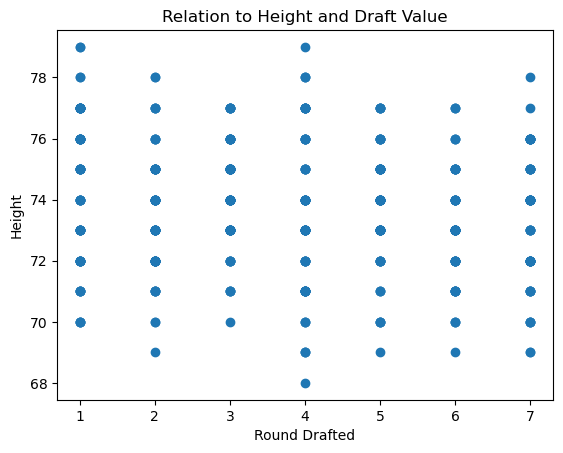

In [376]:
fig, ax = plt.subplots()
ax.scatter(combined_defense['round'], combined_defense["height"])
ax.set(title = "Relation to Height and Draft Value", 
      xlabel = "Round Drafted",
      ylabel = "Height");

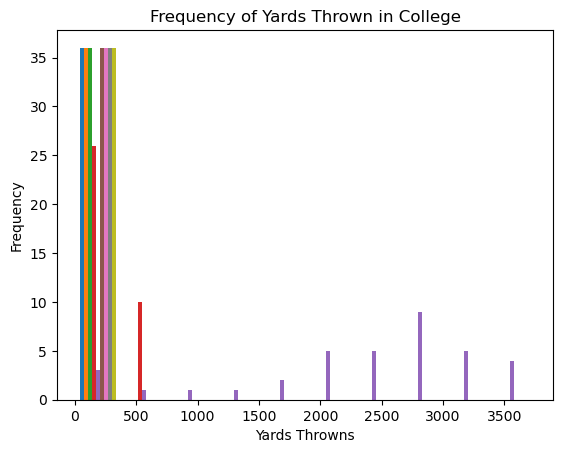

In [378]:
qb_df = pd.DataFrame(combined_qb_filtered,
                    columns = ["height", "weight","Completions", "Passing Attempts", "Passing Yards", 
                              "Passing Touchdowns", "Interceptions", "Passer Rating",
                               "round"])

qb_df
fig, ax= plt.subplots()
ax.hist(qb_df);
ax.set(title = "Frequency of Yards Thrown in College",
       xlabel = "Yards Throwns",
       ylabel = "Frequency");

In [366]:
qb_df

,height,weight,Completions,Passing Attempts,Passing Yards,Passing Touchdowns,Interceptions,Passer Rating,round
51,75.0,210.0,142.500000,213.500000,1705.750000,12.750000,5.000000,116.800000,7.0
63,76.0,214.0,240.000000,396.000000,3322.666667,23.000000,8.000000,146.100000,6.0
140,76.0,222.0,247.750000,424.000000,2682.750000,15.250000,7.500000,116.075000,5.0
147,75.0,215.0,205.333333,334.666667,2677.333333,23.333333,8.000000,135.633333,7.0
183,77.0,221.0,254.666667,425.000000,2733.666667,17.333333,5.800000,123.333333,1.0
205,76.0,217.0,95.666667,146.000000,1156.000000,7.250000,2.000000,94.900000,3.0
214,76.0,233.0,211.500000,348.000000,2904.500000,23.500000,9.500000,147.800000,2.0
233,75.0,221.0,271.333333,402.333333,3387.666667,30.000000,10.666667,165.333333,1.0
258,76.0,228.0,220.750000,388.250000,3048.250000,24.750000,6.500000,134.300000,2.0
262,75.0,231.0,206.500000,295.000000,2698.000000,27.000000,3.000000,173.600000,1.0


In [365]:
combined_skilled_position

,Assist Tackles,Completion Percentage,Completions,Extra Points Made,FGM 1-19 yards,FGM 20-29 yards,FGM 30-39 yards,FGM 40-49 yards,FGM 50+ yards,Field Goal Attempts,...,Total Tackles,Total Touchdowns,Total Two Point Conversions,Yards Per Pass Attempt,Yards Per Reception,Yards Per Rush Attempt,pos_abbr,round,height,weight
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,6.333333,0.000000,0.0,15.466667,0.000000,WR,2.0,73.0,226.0
1,7.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.75,1.000000,0.000000,0.0,0.000000,2.000000,WR,1.0,76.0,211.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,13.333333,0.000000,0.0,10.050000,5.166667,RB,2.0,72.0,247.0
6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,7.750000,0.000000,0.0,14.000000,0.000000,TE,3.0,77.0,255.0
11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.00,7.666667,0.333333,0.0,12.300000,0.000000,TE,4.0,78.0,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,5.250000,0.000000,0.0,10.900000,7.575000,RB,6.0,71.0,210.0
758,0.50,100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.50,10.500000,0.000000,10.5,16.700000,4.333333,WR,4.0,71.0,194.0
770,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.25,1.500000,0.000000,0.0,12.800000,0.000000,TE,4.0,76.0,262.0
783,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,2.000000,0.000000,0.0,16.950000,0.000000,TE,5.0,80.0,265.0


In [309]:
skilled_position = pd.DataFrame(combined_skilled_position,
                                columns = ["height", "weight", "Receptions", "Receiving Yards",
                                          "Receiving Touchdowns", "Rushing Attempts", "Rushing Yards",
                                          "Rushing Touchdowns", "round"]
                               )
skilled_position

,height,weight,Receptions,Receiving Yards,Receiving Touchdowns,Rushing Attempts,Rushing Yards,Rushing Touchdowns,round
0,73.0,226.0,63.000000,994.666667,6.333333,0.000000,0.000000,0.000000,2.0
1,76.0,211.0,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.0
3,72.0,247.0,10.500000,118.000000,0.800000,281.666667,1460.666667,12.666667,2.0
6,77.0,255.0,55.000000,755.500000,9.000000,0.000000,0.000000,0.000000,3.0
11,78.0,258.0,32.666667,395.666667,7.666667,0.000000,0.000000,0.000000,4.0
...,...,...,...,...,...,...,...,...,...
756,71.0,210.0,7.250000,79.500000,0.500000,87.000000,658.750000,4.250000,6.0
758,71.0,194.0,51.250000,858.500000,7.666667,1.000000,4.333333,0.400000,4.0
770,76.0,262.0,12.500000,168.000000,1.500000,0.000000,0.000000,0.000000,4.0
783,80.0,265.0,24.500000,408.500000,2.000000,0.000000,0.000000,0.000000,5.0


In [320]:
defense_df = pd.DataFrame(combined_defense, 
                         columns = ["height", "weight", "Total Tackles", "Solo Tackles", "Assist Tackles",
                                   "Passes Defended", "Sacks", "Forced Fumbles", "Interceptions",
                                   "Interception Touchdowns", "round"])
defense_df

,height,weight,Total Tackles,Solo Tackles,Assist Tackles,Passes Defended,Sacks,Forced Fumbles,Interceptions,Interception Touchdowns,round
2,73.0,195.0,34.000000,24.333333,9.666667,3.666667,0.166667,0.666667,2.000000,0.333333,1.0
4,77.0,275.0,33.666667,20.333333,13.333333,2.666667,8.833333,2.666667,0.000000,0.000000,2.0
7,77.0,260.0,27.000000,14.666667,12.333333,0.333333,4.166667,2.000000,0.000000,0.000000,5.0
8,70.0,186.0,46.666667,38.333333,8.333333,3.666667,0.000000,0.666667,2.000000,0.333333,1.0
9,75.0,198.0,23.666667,20.000000,3.666667,6.333333,0.000000,0.333333,1.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...
780,77.0,266.0,37.000000,21.666667,15.333333,0.000000,6.333333,0.666667,0.000000,0.000000,2.0
782,76.0,281.0,49.750000,23.250000,26.500000,3.250000,4.625000,0.250000,0.500000,0.000000,3.0
786,72.0,239.0,77.250000,46.500000,30.750000,0.500000,2.125000,1.250000,0.500000,0.000000,7.0
787,77.0,259.0,78.666667,43.000000,35.666667,2.666667,2.500000,1.000000,1.666667,0.666667,1.0


In [325]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = qb_df.drop("round", axis = 1)
y = qb_df["round"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

qb_model = RandomForestClassifier()
qb_model.fit(X_train, y_train)
qb_model.score(X_test, y_test)

0.25

In [330]:
X = skilled_position.drop("round", axis = 1)
y = skilled_position["round"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

skilled_model = RandomForestClassifier()
skilled_model.fit(X_train, y_train)
skilled_model.score(X_test, y_test)

0.17391304347826086

In [337]:
from sklearn.ensemble import RandomForestClassifier
X = defense_df.drop("round", axis = 1)
y = defense_df["round"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

defense_model = RandomForestClassifier()
defense_model.fit(X_train, y_train)
defense_model.score(X_test, y_test)

0.20454545454545456

In [106]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [116]:
options = ["Offense", "Defense"]
radio_buttons = widgets.RadioButtons(
    options = options, 
    description = 'Select if your player plays offense or defense:'
)

In [260]:
display(radio_buttons)

RadioButtons(description='Select if your player plays offense or defense:', index=1, options=('Offense', 'Defe…

In [349]:
if radio_buttons.value == "Defense":
    text_input_height = widgets.Text(
    value = '',
    placeholder = "Enter Height in Inches",
    description = 'Height',
    layout=widgets.Layout(width='400px')
    )    
    text_input_weight = widgets.Text(
        value='',
        placeholder = "Enter Weight in Pounds", 
        description = 'Weight',
        layout=widgets.Layout(width='400px')
    )
    text_input_total_tackles = widgets.Text(
        value = '',
        placeholder = "Enter Total Tackles",
        description = 'Total Tackles',
        layout=widgets.Layout(width='400px')
    )
    text_input_solo_tackles = widgets.Text(
        value='',
        placeholder = "Enter Solo Tackles", 
        description = 'Solo Tackles',
        layout=widgets.Layout(width='400px')
    )
    text_input_assist_tackles = widgets.Text(
        value = '',
        placeholder = "Enter Assisted Tackles",
        description = 'Assistted Tackles',
        layout=widgets.Layout(width='400px')
    )
    text_input_passes_defended = widgets.Text(
        value='',
        placeholder = "Enter Passes Defended", 
        description = 'Passes Defended',
        layout=widgets.Layout(width='400px')
    )
    text_input_sacks = widgets.Text(
        value = '',
        placeholder = "Enter Sacks",
        description = 'Sacks',
        layout=widgets.Layout(width='400px')
    )
    text_input_forced_fumbles = widgets.Text(
        value='',
        placeholder = "Enter Forced Fumbles", 
        description = 'Forced Fumbles',
        layout=widgets.Layout(width='400px')
    )
    text_input_interceptions = widgets.Text(
        value = '',
        placeholder = "Enter Interceptions",
        description = 'Interceptions',
        layout=widgets.Layout(width='400px')
    )
    text_input_interception_yards = widgets.Text(
        value='',
        placeholder = "Enter Interception Yards", 
        description = 'Interception Yards',
        layout=widgets.Layout(width='400px')
    )
    text_input_interception_touchdowns = widgets.Text(
        value='',
        placeholder = "Enter Interception Touchdowns", 
        description = 'Interception Touchdowns',
        layout=widgets.Layout(width='400px')
    )
    button = widgets.Button(
        description = "Get Prediction",
        button_style = 'primary'
    )
        
    display(text_input_weight, text_input_height, text_input_total_tackles, text_input_solo_tackles, 
            text_input_assist_tackles, text_input_passes_defended, text_input_sacks, 
            text_input_forced_fumbles, text_input_interceptions, text_input_interception_yards,
            text_input_interception_touchdowns, button)
    def get__defense_prediction(button_click):
        height = text_input_height.value,
        weight = text_input_weight.value,
        total_tackles = text_input_total_tackles.value
        solo_tackles = text_input_solo_tackles.value
        assist_tackles =  text_input_assist_tackles.value,
        passes_defended = text_input_passes_defended.value,
        sacks = text_input_sacks.value,
        forced_fumbles = text_input_forced_fumbles.value,
        interceptions = text_input_interceptions.value,
        interception_yards = text_input_interception_yards.value
        interception_touchdowns = text_input_interception_touchdowns.value,
        
         
        
        user_input_features = np.array([height, weight, total_tackles, solo_tackles, assist_tackles,
                                        passes_defended, sacks, forced_fumbles, interceptions, 
                                        interception_yards, interception_touchdowns
                              ])
        
        prediction = defense_model.predict(user_input_features.T)
        prediction_label = widgets.Label(value = "Prediction: ")
        display(prediction_label)
        prediction_label.value = f"Prediction: {prediction}"
        
    button.on_click(get_prediction)

Text(value='', description='Weight', layout=Layout(width='400px'), placeholder='Enter Weight in Pounds')

Text(value='', description='Height', layout=Layout(width='400px'), placeholder='Enter Height in Inches')

Text(value='', description='Total Tackles', layout=Layout(width='400px'), placeholder='Enter Total Tackles')

Text(value='', description='Solo Tackles', layout=Layout(width='400px'), placeholder='Enter Solo Tackles')

Text(value='', description='Assistted Tackles', layout=Layout(width='400px'), placeholder='Enter Assisted Tack…

Text(value='', description='Passes Defended', layout=Layout(width='400px'), placeholder='Enter Passes Defended…

Text(value='', description='Sacks', layout=Layout(width='400px'), placeholder='Enter Sacks')

Text(value='', description='Forced Fumbles', layout=Layout(width='400px'), placeholder='Enter Forced Fumbles')

Text(value='', description='Interceptions', layout=Layout(width='400px'), placeholder='Enter Interceptions')

Text(value='', description='Interception Yards', layout=Layout(width='400px'), placeholder='Enter Interception…

Text(value='', description='Interception Touchdowns', layout=Layout(width='400px'), placeholder='Enter Interce…

Button(button_style='primary', description='Get Prediction', style=ButtonStyle())

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')

In [290]:
selected_option = radio_buttons.value
if selected_option == "Offense":
    options = ["QB", "RB", "WR", "TE"]
    offense_radio_button = widgets.RadioButtons(
        options = options,
        description = "Select which position on offense"
    )
    display(offense_radio_button)

RadioButtons(description='Select which position on offense', options=('QB', 'RB', 'WR', 'TE'), value='QB')

In [372]:

if offense_radio_button.value == "RB" or offense_radio_button.value =="WR" or offense_radio_button.value =="TE":
    text_input_height = widgets.Text(
        value = '',
        placeholder = "Enter Height in Inches",
        description = 'Height',
        layout=widgets.Layout(width='400px')
       
    )
    text_input_weight = widgets.Text(
        value='',
        placeholder = "Enter Weight in Pounds", 
        description = 'Weight',
        layout=widgets.Layout(width='400px')
    )
    text_input_rushing_attempts = widgets.Text(
        value ='',
        placeholder = "Enter Rushing Attempts",
        description = "Rushing Attempts",
        layout=widgets.Layout(width='400px')
    )
    text_input_rushing_yards = widgets.Text(
        value='',
        placeholder = "Enter Rushing Yards", 
        description = 'Rushing Yards',
        layout=widgets.Layout(width='400px')
    )
    text_input_rushing_touchdowns = widgets.Text(
        value='',
        placeholder = "Enter Rushing Touchdowns", 
        description = 'Rushing Touchdowns',
        layout=widgets.Layout(width='400px')
    )
    text_input_receptions = widgets.Text(
        value='',
        placeholder = "Enter Receptions", 
        description = 'Receptions',
        layout=widgets.Layout(width='400px')
    )
    text_input_receiving_yards = widgets.Text(
        value='',
        placeholder = "Enter Receiving Yards", 
        description = 'Receiving Yards',
        layout=widgets.Layout(width='400px')
    )
    text_input_receiving_touchdowns = widgets.Text(
        value='',
        placeholder = "Enter Receiving Touchdowns", 
        description = 'Receiving Touchdowns',
        layout=widgets.Layout(width='400px')
    )
    button = widgets.Button(
        description = "Get Prediction",
        button_style = 'primary'
    )
    display(text_input_height, text_input_weight, text_input_rushing_attempts, text_input_rushing_yards, text_input_rushing_touchdowns, text_input_receptions, 
            text_input_receiving_yards, text_input_receiving_touchdowns, button)
    def get_statistics(button_click):
       
        height = text_input_height.value,
        weight = text_input_weight.value, 
        rushing_yards = text_input_rushing_yards.value,
        rushing_attempts = text_input_rushing_yards.value,  
        rushing_touchdowns = text_input_rushing_touchdowns.value, 
        receptions = text_input_receptions.value,
        receiving_yards = text_input_receiving_yards.value,
        receiving_touchdowns = text_input_receiving_touchdowns.value,
        
        user_input_features = np.array([height, weight, rushing_yards, rushing_attempts, rushing_touchdowns,
                                        receptions, receiving_yards, receiving_touchdowns])
                
        prediction = skilled_model.predict(user_input_features.T)
        prediction_label = widgets.Label(value = "Prediction: ")
        display(prediction_label)
        prediction_label.value = f"Prediction: {prediction}"
        
        
    button.on_click(get_statistics)
    
elif offense_radio_button.value == "QB":
    text_input_height = widgets.Text(
    value = '',
    placeholder = "Enter Height in Inches",
    description = 'Height',
    layout=widgets.Layout(width='400px')
    )
    text_input_weight = widgets.Text(
        value='',
        placeholder = "Enter Weight in Pounds", 
        description = 'Weight',
        layout=widgets.Layout(width='400px')
    )
    text_input_completions = widgets.Text(
        value ='',
        placeholder = "Enter Completions",
        description = "Completions",
        layout=widgets.Layout(width='400px')
    )
    text_input_passing_attempts = widgets.Text(
        value ='',
        placeholder = "Enter Passing Attempts",
        description = "Passing Attempts",
        layout=widgets.Layout(width='400px')
    )
    text_input_passing_yards = widgets.Text(
        value ='',
        placeholder = "Enter Passing Yards",
        description = "Passing Yards",
        layout=widgets.Layout(width='400px')
    )
    text_input_passing_touchdowns = widgets.Text(
        value ='',
        placeholder = "Enter Passing Touchdowns",
        description = "Passing Touchdowns",
        layout=widgets.Layout(width='400px')
    )
    text_input_interceptions = widgets.Text(
        value ='',
        placeholder = "Enter Interceptions",
        description = "Interceptions",
        layout=widgets.Layout(width='400px')
    )
    text_input_rating = widgets.Text(
        value ='',
        placeholder = "Enter Passer Rating",
        description = "Passer Rating",
        layout=widgets.Layout(width='400px')
    )

    button = widgets.Button(
        description = "Get Prediction",
        button_style = 'primary'
    )
        
    display(text_input_height, text_input_weight, text_input_completions, text_input_passing_attempts,text_input_passing_yards, text_input_passing_touchdowns, text_input_interceptions, 
            text_input_rating, button)
    def get_prediction(button_click):
        height = text_input_height.value,
        weight = text_input_weight.value, 
        completions = text_input_completions.value, 
        passing_attempts = text_input_passing_attempts.value,
        passing_yards = text_input_passing_yards.value,
        passing_touchdowns = text_input_passing_touchdowns.value,
        interceptions = text_input_interceptions.value, 
        rating = text_input_rating.value,

        
        user_input_features = np.array([height, weight, completions, passing_attempts,
                                        passing_yards, passing_touchdowns, interceptions, rating,
                              ])
        
        prediction = qb_model.predict(user_input_features.T)
        prediction_label = widgets.Label(value = "Prediction: ")
        display(prediction_label)
        prediction_label.value = f"Prediction: {prediction}"
        
    button.on_click(get_prediction)
    




Text(value='', description='Height', layout=Layout(width='400px'), placeholder='Enter Height in Inches')

Text(value='', description='Weight', layout=Layout(width='400px'), placeholder='Enter Weight in Pounds')

Text(value='', description='Completions', layout=Layout(width='400px'), placeholder='Enter Completions')

Text(value='', description='Passing Attempts', layout=Layout(width='400px'), placeholder='Enter Passing Attemp…

Text(value='', description='Passing Yards', layout=Layout(width='400px'), placeholder='Enter Passing Yards')

Text(value='', description='Passing Touchdowns', layout=Layout(width='400px'), placeholder='Enter Passing Touc…

Text(value='', description='Interceptions', layout=Layout(width='400px'), placeholder='Enter Interceptions')

Text(value='', description='Passer Rating', layout=Layout(width='400px'), placeholder='Enter Passer Rating')

Button(button_style='primary', description='Get Prediction', style=ButtonStyle())

C:\Users\Nick\Desktop\ML_Projects\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Label(value='Prediction: ')